<a href="https://colab.research.google.com/github/j-claudinei-f/j-claudinei-f/blob/main/Mandelbrot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Fractais e equações diferenciais ordinárias: O conjunto de Mandelbrot**

José Claudinei Ferreira

Departamento de Matemática da Universidade Federal de Alfenas

Esta seção tem o objetivo de mostrar como podemos construir fractais, partindo de uma equação diferencial ordinária da forma:
$$\begin{cases}\frac{d\,z(t)}{dt}&=&f(z(t),t)\\\\z(t_0)&=&z_0,\end{cases}$$ em que $f(u,s)$ é uma função conhecida (para $s$ um número real e $z$ um vetor) e $t_0$ e $z(t_0)$ são conhecidas. Em termos físicos, podemo entender a expressão $(1)$ como a [velocidade](https://pt.wikipedia.org/wiki/Velocidade#Movimento_retil%C3%ADneo_uniforme) de uma partícula, no tempo $t$, enquanto ela percorre um trajeto $z(t)$.

Alguns fractais surgem do erro causado pela escolha do tamanho de passo $h$ na resolução numérica da equação diferencial ordinária definida acima.  

Nesse texto, para $h$ número real escolhido, vamos aproximar a solução da equação diferencial dada por meio da [relação de recorrência](https://colab.research.google.com/drive/1wcaECmV-Kl5xQudK44d1Jv3vlGUkkbwA?usp=sharing), conhecida também como [método de Euler](https://pt.wikipedia.org/wiki/M%C3%A9todo_de_Euler),
$$\begin{cases}z_{n+1}&=&z_n+hf(z_n,t_0+nh)\\\\z_0&=&z_0.\end{cases}$$

**Obs:** Cabe observar que esse método surge da aproximação $$\frac{d\,z(t)}{dt}=f(z(t),t)\approx \frac{z(t+h)-z(t)}{h},$$ em que espera-se ter $$z(t_0+nh)\approx z_n.$$


**O comjunto de Mandelbrot**

Para mostrar um pouco desse efeito escolhemos a equação diferencial, a valores complexos,  $$
\left\{\begin{array}{rcl}\frac{d\, z(t)}{dt}&=&z(t)^2-z(t)+c\\ z(0)&=&x_0+iy_0.\end{array}\right.,\tag{1}$$ em que $$\begin{cases}z(t)&=&x(t)+iy(t)\\\\c&=&c_1+ic_2\\\\i^2&=&-1\\\\&&x_0,\,y_0,\,c_1,\,c_2\in\mathbb{R}.\end{cases}$$



**Obs:** Se preferir lidar com número reais pode usar a equação:
$$
\left\{\begin{array}{rcl}\frac{d\, x(t)}{dt}&=&x(t)^2-y(t)^2-x(t)+c_1\\\frac{d\, y(t)}{dt}&=&2x(t)y(t)-y(t)+c_2\\ x(0)&=&x_0\\y(0&=&y_0,\end{array}\right.,\tag{Versão real}$$ que é equivalente à anterior.

Para $c=0.1+.3i$ podemos definir em linguagem Python a função complexa $f_c(z)=z^2-z+c$ como 

In [ ]:
import numpy as np     # Pacote que permite o uso de Álgebra Linear ou Geometria Analítica.

c=.10+.3j              # Em Python o número imáginário é representado por j.

def f(u,c):            # O comando def é usado para definir função.
  p=u**2-u+c
  return p

f(0,c)                # Chamada da função que acabamos de definir.

(0.1+0.3j)

e verificar que $f_c(1)=c$, por exemplo. Note que, por simplicidade, omitimos o índice $c$ na definição em linguagem Python.

Vamos agora aproximar $z(20)$, de acordo com a Equação $(1)$, pelo método de Euler, com $h=1$, $z(0)=0$ e $z'(t)=f_c(z(t))$.

In [ ]:
def Euler(a,h,p):            # a é o ponto inicial, ou z(t_0), h é o passo e p é o número de iterações.
  Z=[]                       
  Z.append(a)                # Condição inicial
  for i in range(0,p+1):
    Z.append(Z[i]+h*f(Z[i],c)) # Método de Euler
  return Z

Testando o método de Euler.

In [ ]:
h=1 
p=int(20/h)
Z=Euler(0,h,p)
print(Z[p], f(Z[p],c))             # Aproximação para z(20). Note que f_c(z(20)) é praticamente nula.

(0.00734412372335537+0.30446850876864473j) (8.739598106294322e-06+3.600027880135137e-06j)


Podemos visualizar o caminho percorrido por essa aproximação através da figura a seguir, gerada pelos comandos 


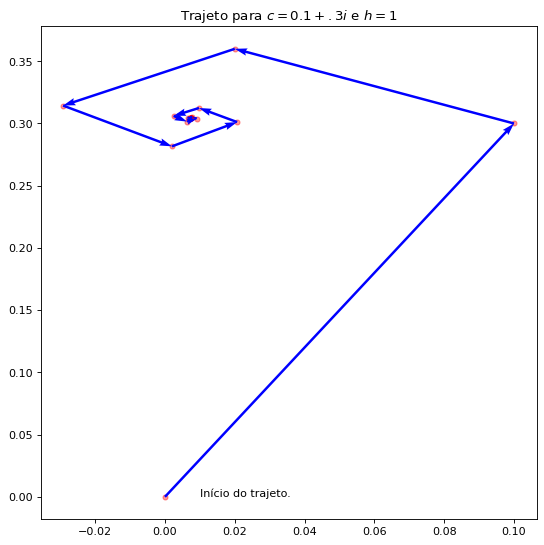

In [ ]:
Z=np.array(Z)
x=Z.real                         # parte real de z
y=Z.imag                         # parte imaginária de

import matplotlib.pyplot as plt  # Para gerar gráficos é preciso chamar um pacote.

fig, ax = plt.subplots(figsize=(8, 8), dpi=80)   # Tamanho e resolução da imagem, do gráfico.
ax.scatter(x,y,s=20, color='red', alpha=0.4)
for i in range(0,p):
  ax.quiver(x[i], y[i], x[i+1]-x[i],y[i+1]-y[i], scale_units='xy', angles='xy', scale=1, color='blue',width=0.005)
plt.title('Trajeto para $c=0.1+.3i$ e $h=1$')
plt.annotate('Início do trajeto.', xy = (x[0]+0.01,y[0]))
plt.show()

# fig.savefig('test2png.png', dpi=100) # caso queira salvar aimagem. Clique na pasta à esquerda para ver o arquivo ou fazer download.

Se tomarmos agora $h=0.1$ obtemos a figura  a seguir. Observamos que nos dois casos obtemos $z(20)\approx 0.0073441+0.3044685i$ e que que $f_c(z(20))\approx 0$, mas o trajeto é bem diferente.

(0.007348908435435293+0.30447511893859436j) (-3.291406036609601e-11+6.013016196071419e-10j)


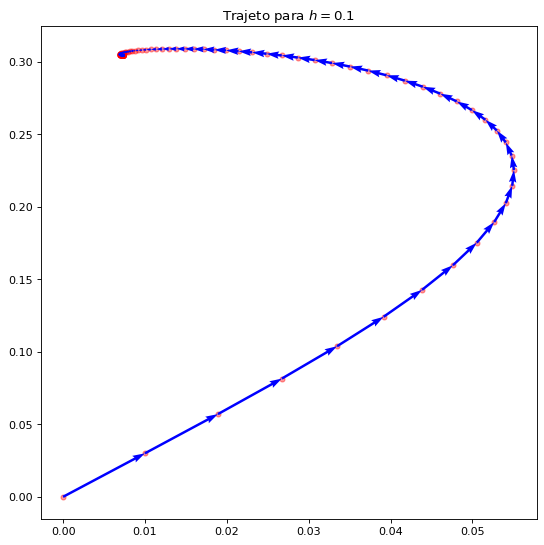

In [ ]:
h=0.1 
p=int(20/h)
Z=Euler(0,h,p)
print(Z[p], f(Z[p],c))             # Aproximação para z(20)

Z=np.array(Z)
x=Z.real
y=Z.imag

fig, ax = plt.subplots(figsize=(8, 8), dpi=80)
ax.scatter(x,y,s=20, color='red', alpha=0.4)
for i in range(0,p):
  ax.quiver(x[i], y[i], x[i+1]-x[i],y[i+1]-y[i], scale_units='xy', angles='xy', scale=1, color='blue',width=0.005)
plt.title('Trajeto para $h=0.1$')
plt.show()

Surge então a seguinte questão: Para que valores de $c$, a solução $z(t)$ da Equação $(1)$, com $z(0)=0$, é uma aproximação para uma raiz da equação $f_c(z)=0$? 

Isso é útil e dá contribuição para pensarmos na complexidade da resolução de equações polinomiais.

Para tentar pensar nessa pergunta geramos a figura a seguir, testando um número grande de constantes $c\in [-1.7,0.5]\times[-1.1,1.1]$ e utilizando o método de Euler, com $h=1$, para aproximar $z(t)$ para alguns valores de $t$ no intervalo $[0,200]$. A parte escura da imagem é, aproximadamente, onde a aproximação numérica para $z(t)$ é limitada.

Essa imagem é conhecida como [conjunto de Mandelbrot](https://en.wikipedia.org/wiki/Mandelbrot_set) e definida a partir da relação de recorrência $z_{n+1}=z_n^2+c$, com $z_0=0$, que é o método de Euler, com $h=1$, para a Equação $(1)$.
	

In [ ]:
s=np.linspace(-1.7,0.5,1000) # Escolha de pontos para teste.
t=np.linspace(-1.1,1.1,1000)

n=len(s)
A= [[p for l in range(n)] for i in range(n)]
A=np.array(A)
h=1
p=200

for i in range(0,n):
  for l in range (0,n):
    Y=0
    c=complex(s[i],t[l])
    for q in range(0,p):
      Y=Y+h*f(Y,c)      # Método de Euler
      if (abs(Y)>=2):
        K=q
        break  
      else:
        K=p                    
    A[i,l]=K

A matriz com o número de iterações, até que ultrapasse 2 em módulo, é que produz o fractal que segue:

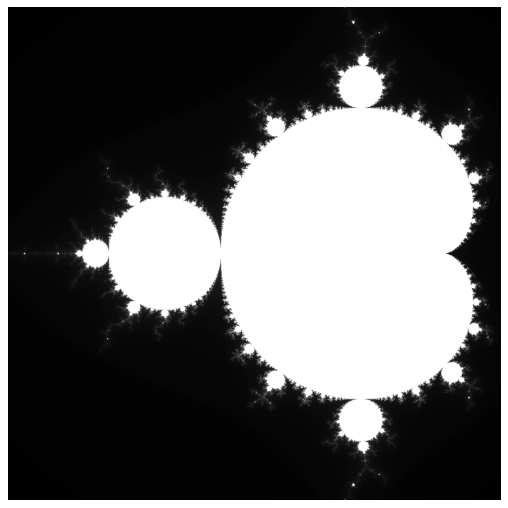

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8), dpi=80)
plt.imshow(np.transpose(A), cmap='gray')
plt.axis('off')
plt.show()

Você pode brincar com cores e pacotes para imgans, como no exemplo:

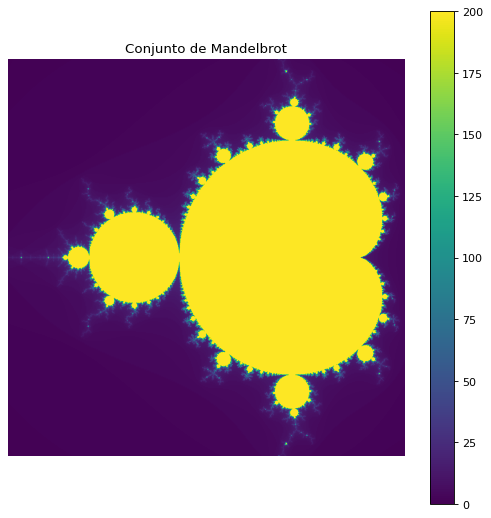

In [ ]:
ax=plt.figure(figsize=(8, 8), dpi=80)
plt.imshow(np.transpose(A), cmap='viridis')

# set the title and axis labels
plt.title('Conjunto de Mandelbrot')
#plt.xlabel('X Axis')
#plt.ylabel('Y Axis')
plt.axis('off')

# show the color bar
plt.colorbar()

# adjust the figure size
# show the image
plt.show()

Embora nossa pergunta tenha sido sobre aproximar raízes de $f_c(z)=0$, inspirados pelo conjunto de Mandelbrot, fazemos mais alguns testes usando a limitação da aproximação para $z(t)$. Tomando $h=0.5$, e fazendo pequenas alterações no código em Python, obtemos a figura que segue, testando um número grande de constantes $c\in [-8,1.5]\times[-4.75,4.75]$. A parte escura da imagem é, aproximadamente, onde a aproximação numérica para $z(t)$ é limitada.


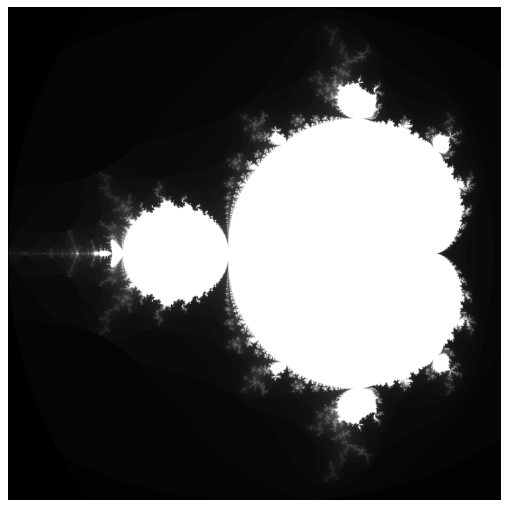

In [ ]:
s=np.linspace(-8,1.5,1000) # Escolha de pontos para teste.
t=np.linspace(-4.75,4.75,1000)

n=len(s)
A= [[p for l in range(n)] for i in range(n)]
A=np.array(A)
h=0.5
p=100

for i in range(0,n):
  for l in range (0,n):
    Y=0
    c=complex(s[i],t[l])
    for q in range(0,p):
      Y=Y+h*f(Y,c)      # Método de Euler
      if (abs(Y)>=4):
        K=q
        break  
      else:
        K=p                    
    A[i,l]=K

plt.figure(figsize=(8, 8), dpi=80)
plt.imshow(np.transpose(A), cmap='gray')
plt.axis('off')
plt.show()

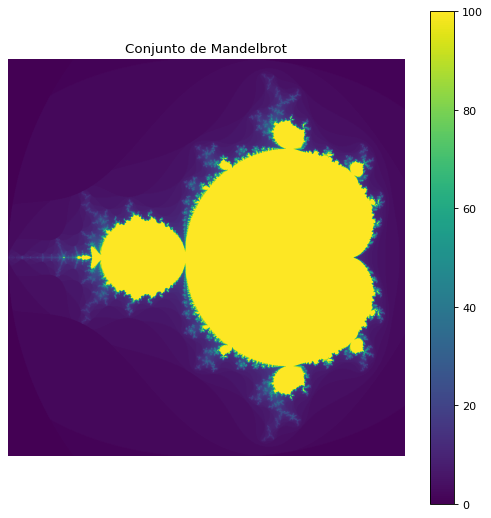

<Figure size 600x600 with 0 Axes>

In [ ]:
ax=plt.figure(figsize=(8, 8), dpi=80)
plt.imshow(np.transpose(A), cmap='viridis')

# set the title and axis labels
plt.title('Conjunto de Mandelbrot')
#plt.xlabel('X Axis')
#plt.ylabel('Y Axis')
plt.axis('off')

# show the color bar
plt.colorbar()

# adjust the figure size
plt.figure(figsize=(6, 6))

# show the image
plt.show()

Tomando agora $h=0.1$ e usando código que segue, obtemos as figura abaixo, testando um número grande de constantes $c\in [-220,20]\times[-120,120]$.


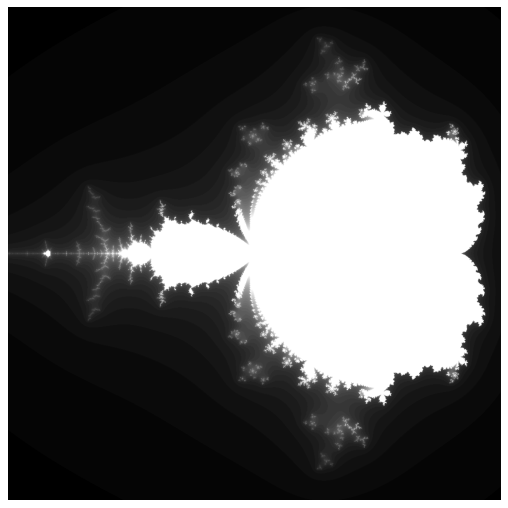

In [ ]:
s=np.linspace(-220,20,1000) # Escolha de pontos para teste.
t=np.linspace(-120,120,1000)

n=len(s)
A= [[p for l in range(n)] for i in range(n)]
A=np.array(A)
h=0.1
p=50

for i in range(0,n):
  for l in range (0,n):
    Y=0
    c=complex(s[i],t[l])
    for q in range(0,p):
      Y=Y+h*f(Y,c)      # Método de Euler
      if (abs(Y)>=400):
        K=q
        break  
      else:
        K=p                    
    A[i,l]=K

plt.figure(figsize=(8, 8), dpi=80)
plt.imshow(np.transpose(A), cmap='gray')
plt.axis('off')
plt.show()

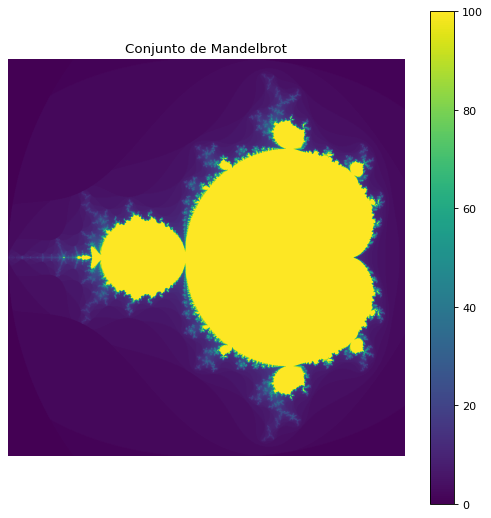

<Figure size 600x600 with 0 Axes>

In [ ]:
ax=plt.figure(figsize=(8, 8), dpi=80)
plt.imshow(np.transpose(A), cmap='viridis')

# set the title and axis labels
plt.title('Conjunto de Mandelbrot')
#plt.xlabel('X Axis')
#plt.ylabel('Y Axis')
plt.axis('off')

# show the color bar
plt.colorbar()

# adjust the figure size
plt.figure(figsize=(6, 6))

# show the image
plt.show()

A parte escura da imagem é, aproximadamente, onde a aproximação numérica para $z(t)$ é limitada. Cabe notar que se tomarmos $h=2$ e  $c\in [-0.3,0.3]\times[-0.3,0.3]$ obtemos figura quase idêntica a figuras anteriores. Isso mostra, de certa forma, a influência na escolha de $h$ para uma boa aproximação numérica.

Voltando a nossa pergunta, nem precisamos alterar o código em linguagem R para perceber que se exigirmos a limitação de $f(z(t))$ vamos obter as mesmas figuras. 
Se tomarmos, por exemplo, $c=200+200i$ e $h=0.01$ obtemos a primeira figura que segue. Observamos que  $z(20)\approx -5.93879+15.53087i$, que $f_c(z(20))\approx 0$ e que o trajeto é limitado, ou seja, parece que, quanto menor for $h$ maior será a região em que a aproximação para $z(t)$ é limitada. Note que, para $h=0.019$ obtemos a segunda figura que segue, em que a aproximação para $z(t)$ quase escapa da limitação.

Escolhendo alguns valores de $c$ vemos que o conjunto solução das equações $f_c(z)=0$ parece atrair as aproximações numéricas para $z(t)$, que é solução da Equação $(1)$,  para $t$ grande. Um pouco mais de simulações, para esse exemplo, sugere também que  as soluções que têm essa atração são aquelas que possuem parte real negativa. Isso, de certa forma, nos diz que nem toda raiz de $f_c(z)$ pode ser aproximada por este procedimento.

(-5.938788358712476+15.530872336359323j) (2.842170943040401e-14-8.526512829121202e-14j)


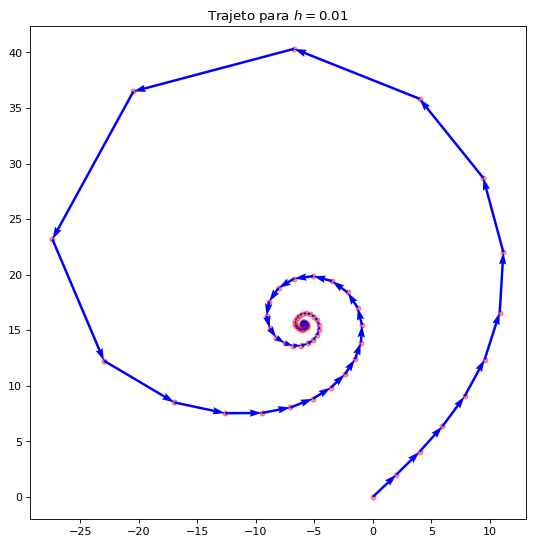

In [ ]:
h=0.01 
p=int(20/h)
c=200+200j

def Euler(a,h,p):
  Z=[]
  Z.append(a)                # Condição inicial
  for i in range(0,p+1):
    Z.append(Z[i]+h*f(Z[i],c)) # Método de Euler
  return Z

Z=Euler(0,h,p)
print(Z[p], f(Z[p],c))             # Aproximação para z(20)

Z=np.array(Z)
x=Z.real
y=Z.imag

fig, ax = plt.subplots(figsize=(8, 8), dpi=80)
ax.scatter(x,y,s=20, color='red', alpha=0.4)
for i in range(0,p):
  ax.quiver(x[i], y[i], x[i+1]-x[i],y[i+1]-y[i], scale_units='xy', angles='xy', scale=1, color='blue',width=0.005)
plt.title('Trajeto para $h=0.01$')

plt.show()

(-5.938788358712474+15.530872336359316j) (2.2737367544323206e-13+5.684341886080802e-14j)


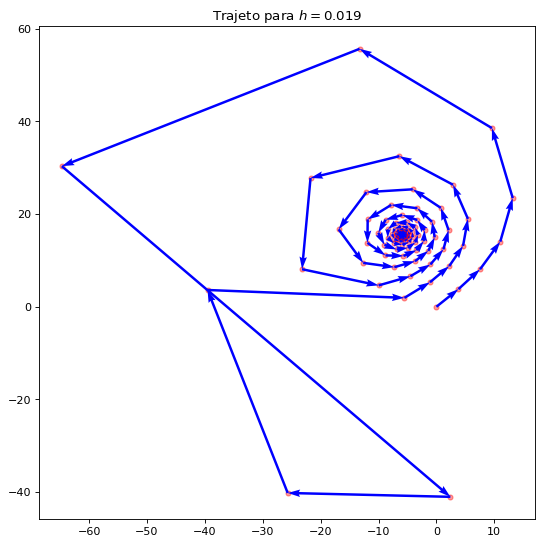

In [ ]:
h=0.019 
p=int(20/h)
c=200+200j

def Euler(a,h,p):
  Z=[]
  Z.append(a)                # Condição inicial
  for i in range(0,p+1):
    Z.append(Z[i]+h*f(Z[i],c)) # Método de Euler
  return Z

Z=Euler(0,h,p)
print(Z[p], f(Z[p],c))             # Aproximação para z(20)

Z=np.array(Z)
x=Z.real
y=Z.imag

fig, ax = plt.subplots(figsize=(8, 8), dpi=80)
ax.scatter(x,y,s=20, color='red', alpha=0.4)
for i in range(0,p):
  ax.quiver(x[i], y[i], x[i+1]-x[i],y[i+1]-y[i], scale_units='xy', angles='xy', scale=1, color='blue',width=0.005)
plt.title('Trajeto para $h=0.019$')

plt.show()

**Bordas de forma implícita**

Olhando para a definição dada na Equação ($1^*$) e sua (Versão real), com O método de Euler com $h=1$, podemos fazer uma definição de forma implícita e recorrente.

Primeiro note que, se $z=x+iy$, então $$z_{n+1}=z_n^2+c=(x_n^2-y_n^2+c_1)+i(2x_ny_n+c_2).$$

[Isso sugere definir a função](https://math.stackexchange.com/questions/4401337/making-the-mandelbrot-fractal-in-desmos-online-graphing-calculator/4401771#4401771) 
$$g_1(x,y)=x^2-y^2,\qquad g_2(x,y)=2xy$$ e depois tomamos $$(x_0,y_0)=(c_1,c_2)$$ e  
$$(x_{n+1},y_{n+1})=(g_1(x_n,y_n)^2-g_2(x_n,y_n)^2+x_0,\,2g_1(x_n,y_n)g_2(x_n,y_n)+y_0).$$

As curvas abaixo são dadas implícitamente pela equação $$x_n^2+y_n^2-1=0,$$ deixando $c_1,c_2\in \mathbb{R}$ livres.

<font color=blue> Escrito desse modo, esse processo implícito e recursivo é bastante intrincado e por isso fica caro computacionalmente iterar para $n>4$.

Por isso, mudamos a definição, começando de 0 até p, em vez de de p até 0.

In [ ]:
def fit(x,y,p):
  m=x
  q=y
  for i in range(0,p):
    if (m==np.NaN or m>=100 or q==np.NaN or q>=100):    
      m,q=100,100   
    else: 
      m,q=m**2-q**2+x,2*m*q+y                                                              # c_1 e c_2 são quaisquer, podem ser então x e y.
  return [m,q]

Vejamos como ficam as imagens:

n=0


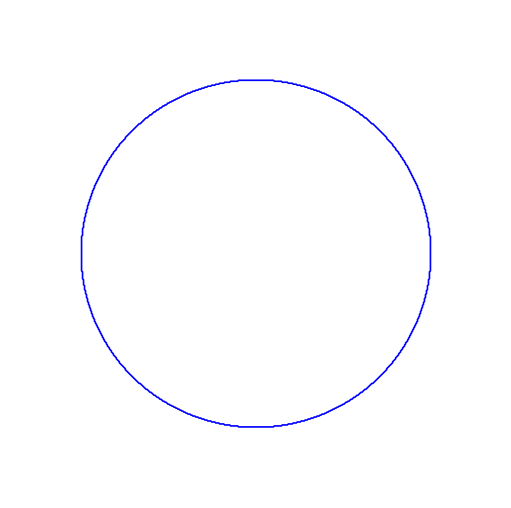

n=1


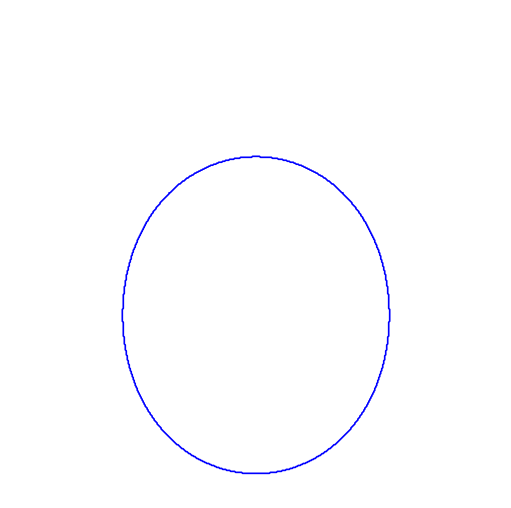

n=2


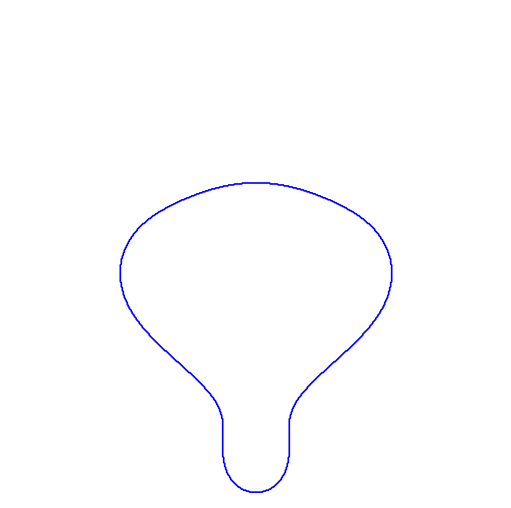

n=3


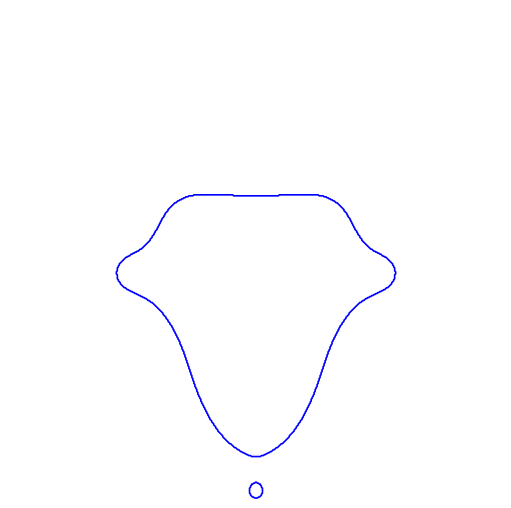

n=4


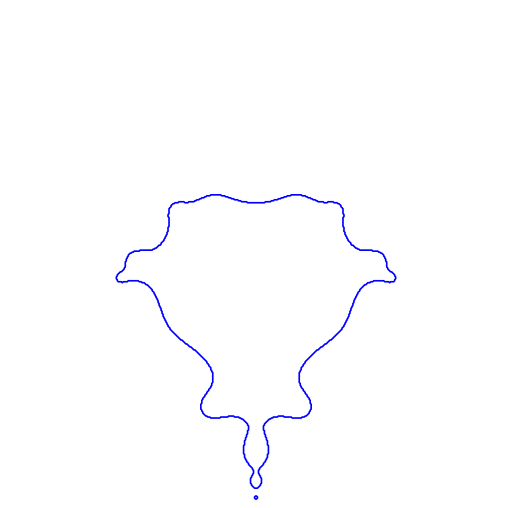

n=5


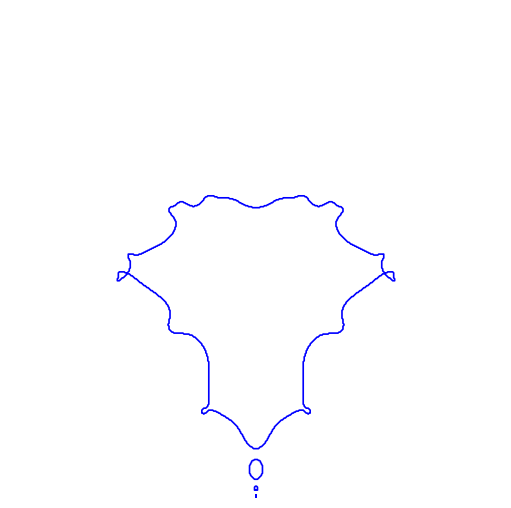

n=6


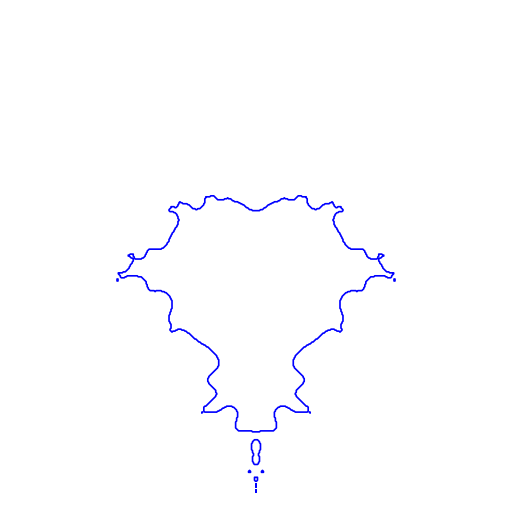

n=7


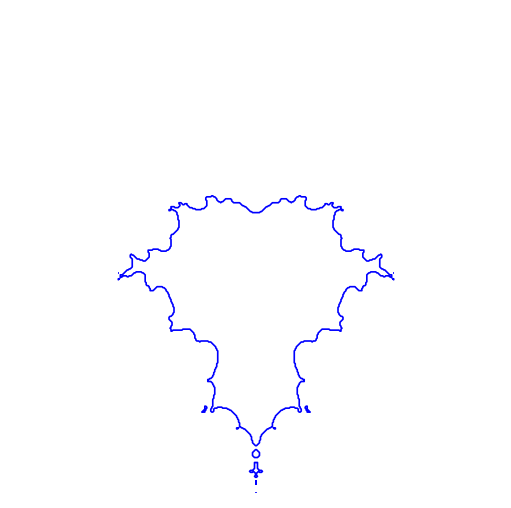

n=8


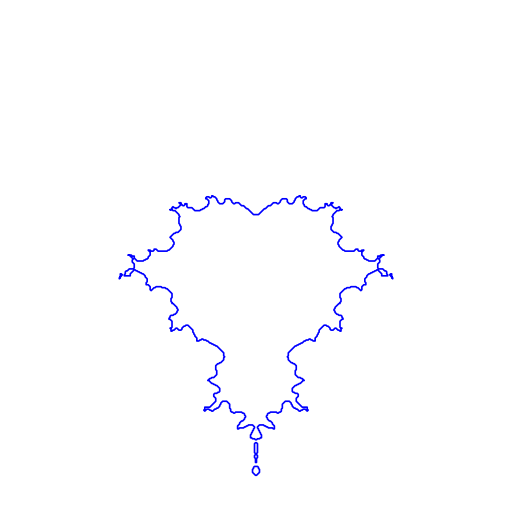

n=9


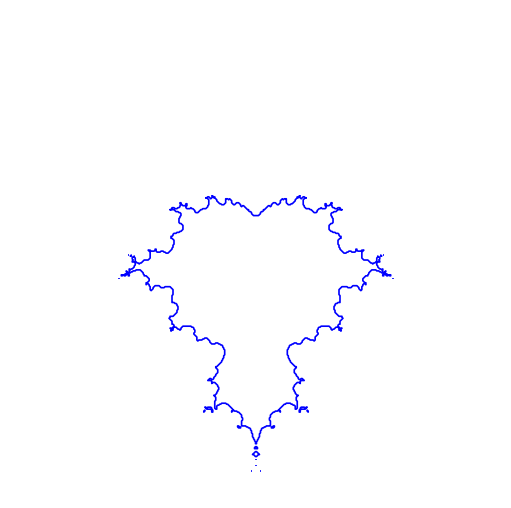

n=10


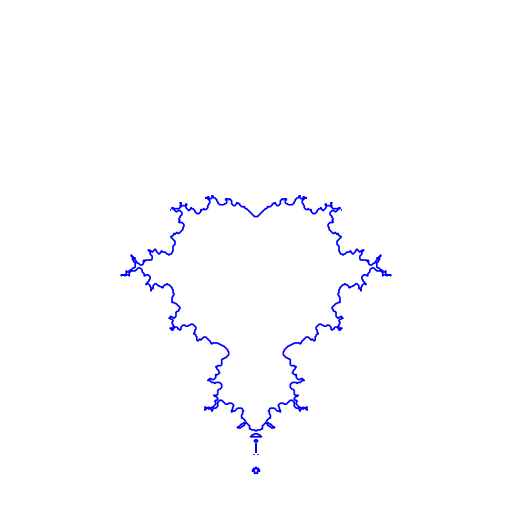

n=11


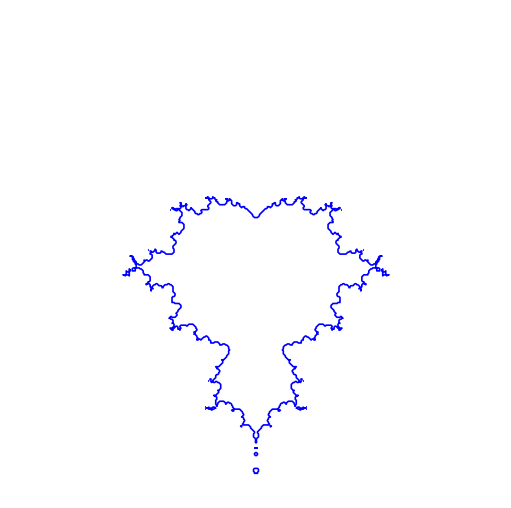

n=12


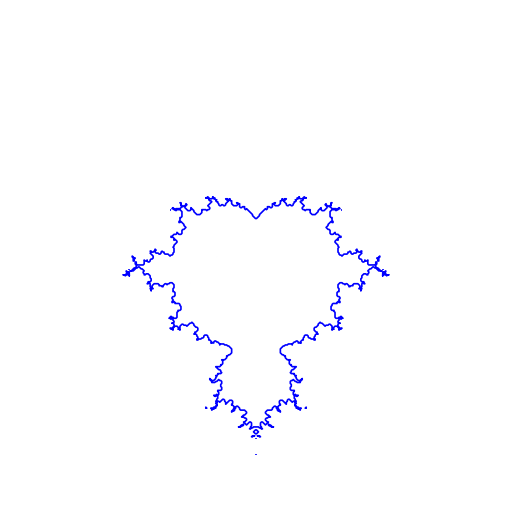

n=13


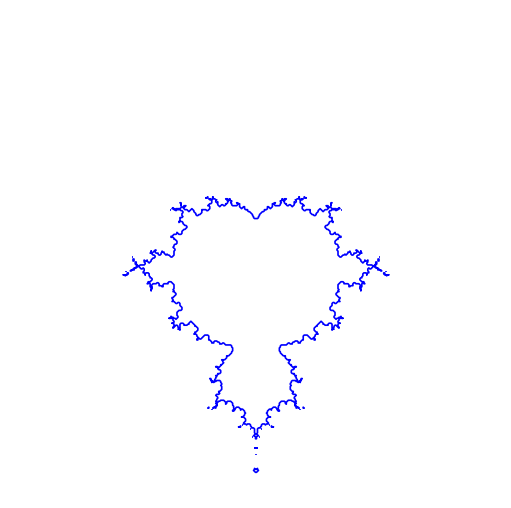

n=14


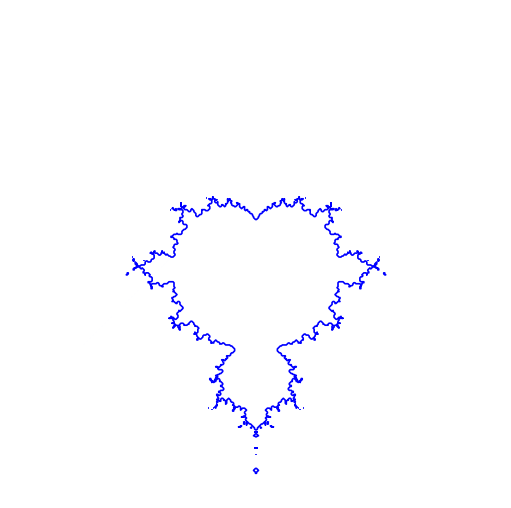

n=15


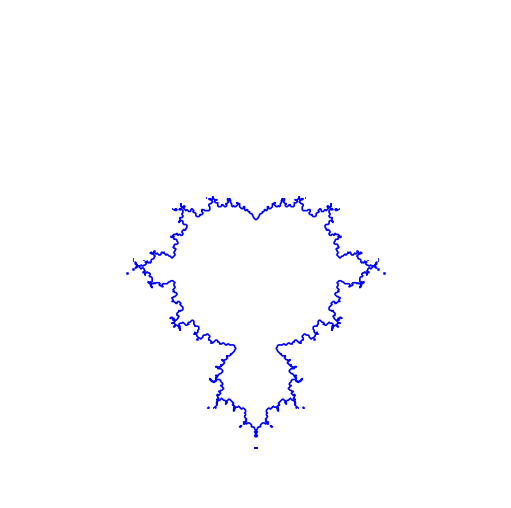

n=16


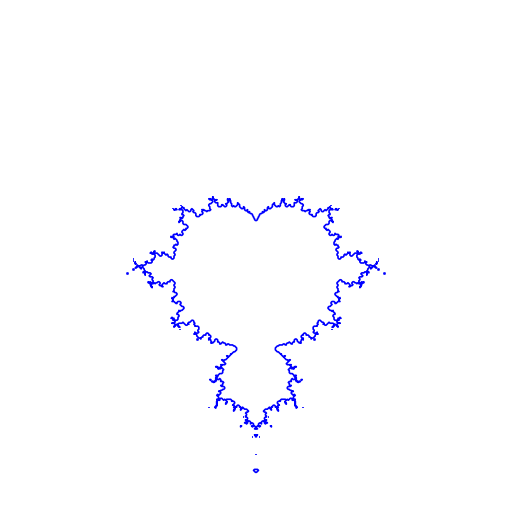

n=17


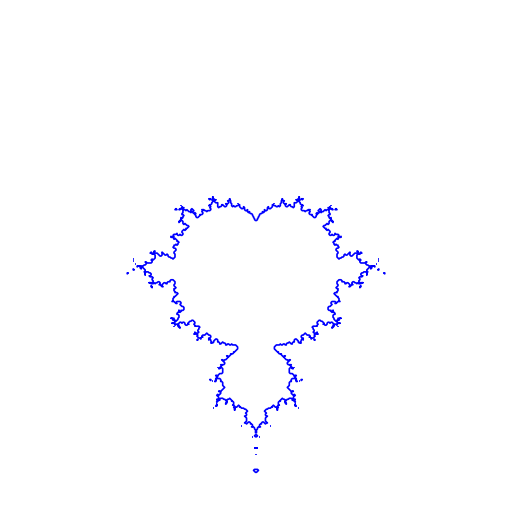

n=18


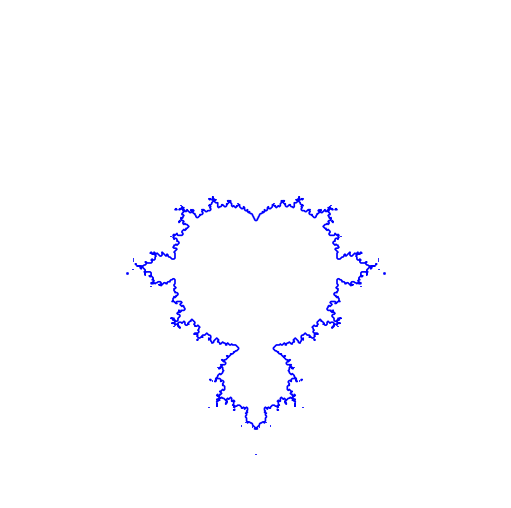

n=19


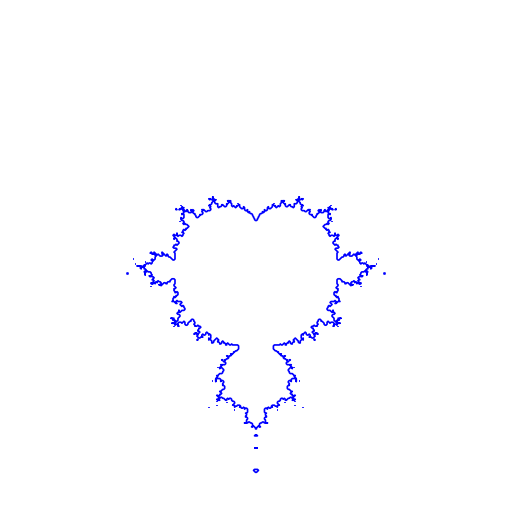

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

for p in range(0,20):
  def mf(x,y,p):
    return fit(x,y,p)[0]**2+fit(x,y,p)[1]**2-1
  m=500
 
  x=np.linspace(-2,2, m)
  y=np.linspace(-2,2,m)
  z=[[p for l in range(m)] for i in range(m)]
  z=np.array(z)
  for i in range(0,m):
    for j in range(0,m):
      q=mf(x[i],y[j],p)
      if (q==np.NaN or q>=100 ): # Para evitar números muito grandes no processo.
        z[i,j]=2
      else: 
        z[i,j]=q
    
# Criando a figura e projeção em 3D
  print(f'n={p}') 
  ig, ax = plt.subplots(figsize=(8,8), dpi=80)
  plt.axis('off')
  CS = ax.contour(x,y,z,[0],colors='blue')
  plt.show()